In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract as py
from pytesseract import Output
import regex as re

from datetime import datetime

import cv2 
import numpy as np
from matplotlib import pyplot as plt

py.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' 

Il y a 1 visage(s).


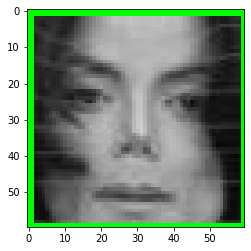

In [2]:

imagePath = './CNI/ci.jpg'
dirCascadeFiles = './opencv/haarcascades_cuda/'
cascadefile = dirCascadeFiles + "haarcascade_frontalface_alt.xml"

classCascade = cv2.CascadeClassifier(cascadefile)

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = classCascade.detectMultiScale(
    gray,
    scaleFactor = 1.1,
    minNeighbors = 5,
    minSize = (30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print ("Il y a {0} visage(s).".format(len(faces)))

## Encadre le visage detecté 
for(x, y, w, h) in faces :
    cv2.rectangle(image, (x, y), (x+w , y+h), (0,255,0),2)
    
plt.imshow(image)

f = faces[0]

plt.imshow(image[f[1]:f[1]+f[3], f[0]:f[0]+f[2]])

In [22]:
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image,1)


print("Txt Lu = " + py.image_to_string(image))


Txt Lu = REPUBLIQUE FRANCAISE
‘CARTE NATIONALE DIDENTITE N= 7700773MIO777__Nationaité Francaise

3 Nom { GACKSON

Prtnomiy: MICHAEL, JOSEPH

    

seve: Néis e:29,08,1958
=
y Signature
te
i ee

 

IDFRAJACKSON<<<<<<<<<ccccccccceece
LUROD<<MICHAEL<< JOSEPH<7711019M6


Txt Lu = REPUBLIQUE FRANCAISE
‘CARIE NATIONALE DIDENTTE N= 7700773MTO777 Nationale Fancale

 

MC Nom JACKSON

Prenomis MICHAEL, JOSEPH

see t tee: 29.08.1958
H GARY, ENDJANA (99)

Yate

‘Sigrare

wigs

 

IDFRAJACKSON<<cecececcccececenc cee
LUROD<<MICHAEL«< JOSEPH <7711019M6


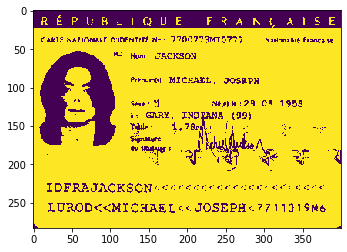

In [23]:

finalImage = remove_noise(thresholding(grayscale(image)))
plt.imshow(finalImage)
texteCI = py.image_to_string(finalImage)
print("Txt Lu = " +texteCI)

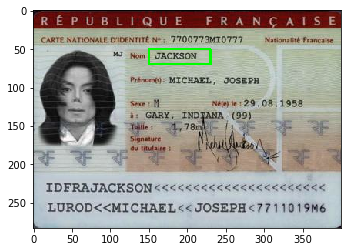

In [24]:
image = cv2.imread(imagePath)

x = 150
y = 50
w = 80
h = 20

plt.imshow(cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),2))

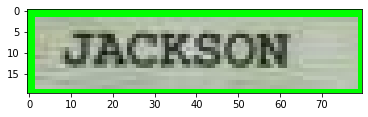

In [25]:
region_nom = image[y:y+h, x:x+w]
plt.imshow(region_nom)


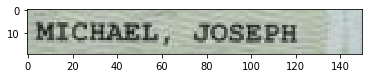

In [26]:

x2 = 173
y2 = 81
w2 = 150
h2 = 20

region_prenom = image[y2:y2+h2, x2:x2+w2]
plt.imshow(region_prenom)



In [27]:
region_nom = remove_noise(thresholding(grayscale(region_nom)))
nomCI = py.image_to_string(region_nom)


region_prenom = remove_noise(thresholding(grayscale(region_prenom)))
prenomCI = py.image_to_string(region_prenom)


print(nomCI + " " + prenomCI)

JACKSON MICHAEL, JOSEPH
